<a href="https://colab.research.google.com/github/Heliwrenaid/ML-network-embeddings/blob/js-dev/Embedding_alg_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For the test purpose, I defined this part of the project in my google drive, you can easily modify it if you want
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [3]:
%cd drive/MyDrive/GraphEmbedding-master
!python setup.py install
%cd examples
!python "./setup.py" install
!python deepwalk_wiki.py
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

# If this code does not work then:
# uncomment lines below
!pip uninstall ge
!pip install ge
# - run this code again 
# - Restart environment 

/content/drive/MyDrive/GraphEmbedding-master
running install
running bdist_egg
running egg_info
writing ge.egg-info/PKG-INFO
writing dependency_links to ge.egg-info/dependency_links.txt
writing requirements to ge.egg-info/requires.txt
writing top-level names to ge.egg-info/top_level.txt
reading manifest file 'ge.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'ge.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/ge
copying build/lib/ge/classify.py -> build/bdist.linux-x86_64/egg/ge
copying build/lib/ge/walker.py -> build/bdist.linux-x86_64/egg/ge
copying build/lib/ge/utils.py -> build/bdist.linux-x86_64/egg/ge
copying build/lib/ge/alias.py -> build/bdist.linux-x86_64/egg/ge
copying build/lib/ge/__init__.py -> build/bdist.linux-x86_64/egg/ge
creating build/bdist.linux-x86_64/egg/ge/models
copying build/lib/ge/models/line.p

In [80]:
%%capture
# GENERAL
import numpy as np
import ge as ge 
print(np.__version__)

from ge.classify import read_node_label, Classifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import time

# ALGORITHMS 
from ge import DeepWalk
from ge import LINE
from ge import Node2Vec
from ge import SDNE
from ge import Struc2Vec



In [5]:
import csv
from __future__ import print_function

def write_embeddings(filename="FILENAME.txt"):
  
  f = open(filename, 'w')
  writer = csv.writer(f,delimiter=' ')

  M = []
  for key,values in embeddings.items():
    L = []
    L.append(key)
    for value in values:
      L.append(value)
    M.append(L)

  strig = ''

  for m in M:
    writer.writerow(m)

  f.close()

In [102]:
from sklearn.manifold import TSNE
def makeTsneAndPrint(filename="hejeczka.txt",algorithm="embedding Algo"):
  # extracting data without id's
  File_data = np.genfromtxt(filename, dtype=float,invalid_raise = False,usecols=np.arange(1, 65))

  # extracting id's from source file
  as_labels = np.genfromtxt(filename, dtype=float,invalid_raise = False,usecols=np.arange(0, 1))

  # making embeddings 
  embedding = TSNE(n_components=2,learning_rate='auto',init='random',early_exaggeration=30).fit_transform(File_data)

  # plot limiting
  plt.figure(figsize=(10,10))
  plt.xlim(embedding[:,0].min()-2,embedding[:,0].max() + 2)
  plt.ylim(embedding[:,1].min()-2,embedding[:,1].max() + 2)

  # assigning numbers to points in plot 
  for i in range(len(embedding)):
    plt.text(embedding[i,0],embedding[i,1],str(as_labels[i]),fontdict={'weight': 'bold', 'size': 9},ha="center", va="center",bbox = dict(boxstyle=f"circle,pad={0.25}", fc="lightgrey"))

  title = "Autonomous Systems Embeddings for: " + str(algorithm)
    # plotting
  plt.xlabel(' t-SNE 1st coordinate',fontweight="bold")
  plt.ylabel(' t-SNE 2nd coordinate', fontweight="bold")
  plt.title(title ,fontweight="bold")
  plt.ion()
  plt.show()

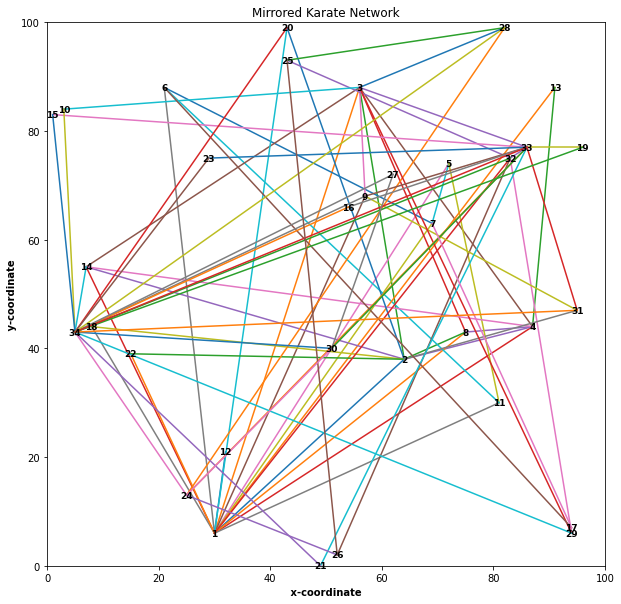

In [103]:
# Connections plotting

import matplotlib.pyplot as plt
import random 
graph = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])# Read graph
plt.figure(figsize=(10,10))
plt.xlim(0,100)
plt.ylim(0,100)

node_list = {}

# randomizing AS locations in map
for i in graph.nodes:
  x_random = random.randint(0,100)
  y_random = random.randint(0,100)
  node_list[i]= ([x_random,y_random])  
  plt.text(x_random,y_random,str(i),fontdict={'weight': 'bold', 'size': 9},ha="center", va="center")

# Looking for edges
for j in graph.edges:
  plt.plot([node_list[j[0]][0],node_list[j[1]][0]],[node_list[j[0]][1],node_list[j[1]][1]])

plt.title('Autonomous Systems Connections (distances irrelevant - randomized)',fontweight="bold")

print()
print()

plt.xlabel(' x-coordinate ',fontweight="bold")
plt.ylabel(' y-coordinate ', fontweight="bold")
plt.title('Mirrored Karate Network')
plt.show()

Structure comparison between embedding algorithms
- LINE
- Deepwalk
- Node2Vec
- Struc2Vec

Dataset in "Wiki_EdgeList" is Mirrored karate Network. It's description is available here:
https://networkrepository.com/soc-karate.php

/content/drive/MyDrive/GraphEmbedding-master/examples
alias.py	  LINE.txt	      Node2Vec.txt	struc2vec_flight.py
Deepwalk.txt	  line_wiki.py	      node2vec_wiki.py	Struc2Vec.txt
deepwalk_wiki.py  node2vec_flight.py  sdne_wiki.py	temp_struc2vec
alias.py	  LINE.txt	      Node2Vec.txt	struc2vec_flight.py
Deepwalk.txt	  line_wiki.py	      node2vec_wiki.py	Struc2Vec.txt
deepwalk_wiki.py  node2vec_flight.py  sdne_wiki.py	temp_struc2vec
Learning embedding vectors...
Learning embedding vectors done!


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


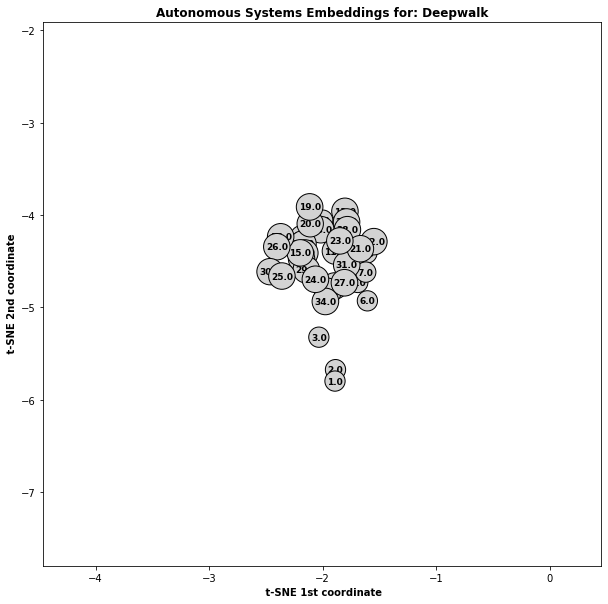

In [104]:
height = []
bars = []
!pwd
!ls
start = time.time()

G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])# Read graph
!ls
model = DeepWalk(G,walk_length=10,num_walks=80,workers=1)#init model
model.train(window_size=5,iter=3)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("Deepwalk")
write_embeddings("Deepwalk.txt")
makeTsneAndPrint("Deepwalk.txt","Deepwalk")

Epoch 1/50
1/1 - 2s - loss: 1.3868 - first_order_loss: 0.6930 - second_order_loss: 0.6937
Epoch 2/50
1/1 - 0s - loss: 1.3900 - first_order_loss: 0.6974 - second_order_loss: 0.6927
Epoch 3/50
1/1 - 0s - loss: 1.3903 - first_order_loss: 0.6970 - second_order_loss: 0.6933
Epoch 4/50
1/1 - 0s - loss: 1.3867 - first_order_loss: 0.6952 - second_order_loss: 0.6915
Epoch 5/50
1/1 - 0s - loss: 1.3873 - first_order_loss: 0.6947 - second_order_loss: 0.6926
Epoch 6/50
1/1 - 0s - loss: 1.3885 - first_order_loss: 0.6957 - second_order_loss: 0.6928
Epoch 7/50
1/1 - 0s - loss: 1.3811 - first_order_loss: 0.6907 - second_order_loss: 0.6905
Epoch 8/50
1/1 - 0s - loss: 1.3874 - first_order_loss: 0.6951 - second_order_loss: 0.6923
Epoch 9/50
1/1 - 0s - loss: 1.3862 - first_order_loss: 0.6943 - second_order_loss: 0.6919
Epoch 10/50
1/1 - 0s - loss: 1.3859 - first_order_loss: 0.6945 - second_order_loss: 0.6913
Epoch 11/50
1/1 - 0s - loss: 1.3859 - first_order_loss: 0.6952 - second_order_loss: 0.6908
Epoch 12

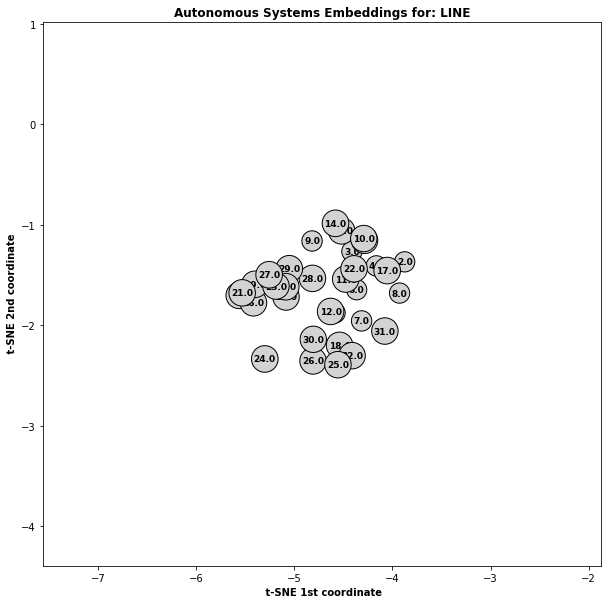

In [105]:
start = time.time()

G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

model = LINE(G,embedding_size=128,order='all') #init model,order can be ['first','second','all']
model.train(batch_size=1024,epochs=50,verbose=2)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("LINE")
write_embeddings("LINE.txt")
makeTsneAndPrint("LINE.txt","LINE")

Preprocess transition probs...
Learning embedding vectors...
Learning embedding vectors done!


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


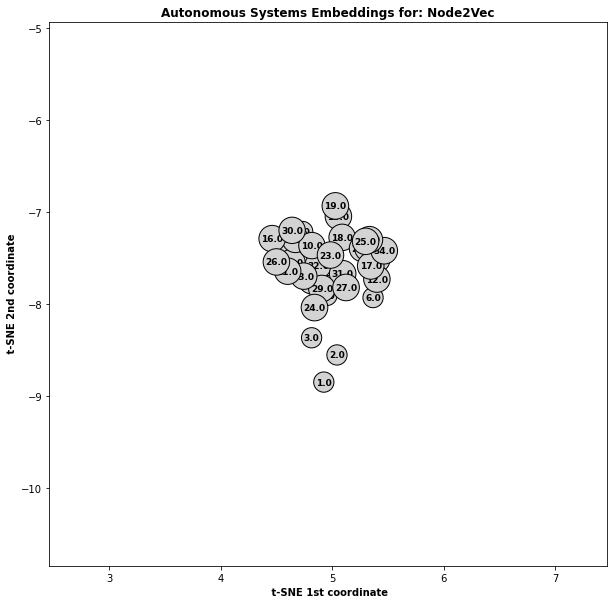

In [106]:
start = time.time()
G=nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',
                        create_using = nx.DiGraph(), nodetype = None, data = [('weight', int)])#read graph

model = Node2Vec(G, walk_length = 10, num_walks = 80,p = 0.25, q = 4, workers = 1)#init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors
end = time.time()

height.append(end - start)
bars.append("Node2Vec")
write_embeddings("Node2Vec.txt")
makeTsneAndPrint("Node2Vec.txt","Node2Vec")

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    8.6s remaining:    8.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1601s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.3s finished


Learning representation...
Learning representation done!


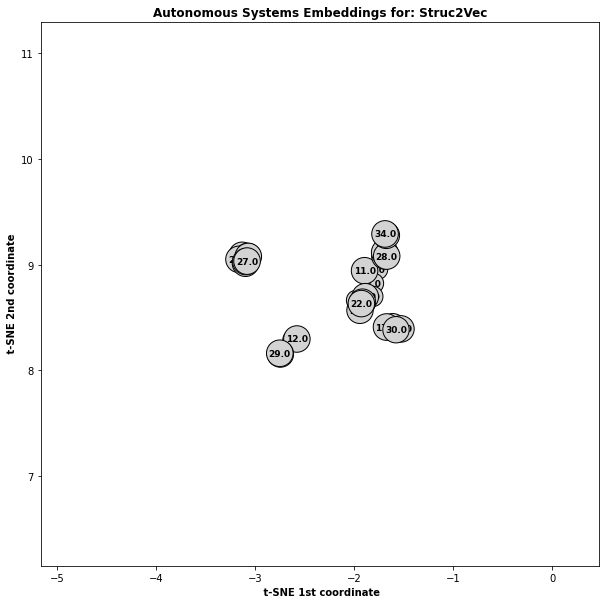

In [107]:
start = time.time()
G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

model = model = Struc2Vec(G, 10, 80, workers=4, verbose=40, ) #init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("Struc2Vec")
write_embeddings("Struc2Vec.txt")
makeTsneAndPrint("Struc2Vec.txt","Struc2Vec")

Time comparison between embedding algorithms
- LINE
- Node2Vec
- Deepwalk
- Struc2Vec

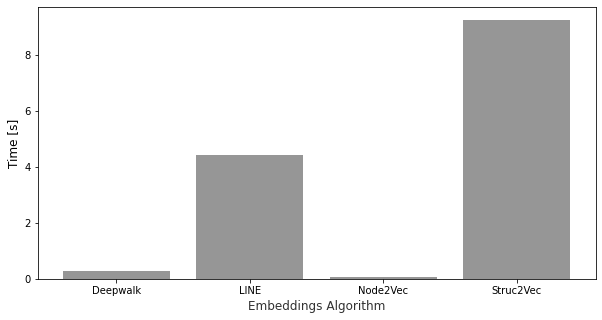

In [108]:
# Make a dataset:
y_pos = np.arange(len(height))
 
#Figsize
plt.figure(figsize=(10,5))
 
# Create bars
plt.bar(y_pos, height, color = '#969696')
  
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Embeddings Algorithm', fontsize=12, color='#323232')
plt.ylabel('Time [s]', fontsize=12)

plt.show()